In [62]:
import cv2 as cv
import cv2
from PIL import Image
import numpy as np
#from google.colab.patches import cv2_imshow
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.measure import label
from sklearn.feature_extraction import image
import time

In [323]:
from skimage.transform import hough_line, hough_line_peaks

In [2]:
def cv2_imshow(img):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.show()

In [3]:
def get_color_clusters(im, n_clusters=2):
    # im: numpy array of a 3-channel image
    colors = im.reshape(-1,3)  # a list of all the pixel colors in the image
    kmeans = KMeans(n_clusters=n_clusters).fit(colors)
    # ^ KMeans() is from sklearn.cluster
    kmap = kmeans.labels_.copy().reshape(im.shape[0:2])  # an image where each pixel is replaced by its kmeans label
    clusters, num_clusters = label(kmap, connectivity=1, background=-1, return_num=True)  # an image where each pixel is replaced by its cluster label
    # ^ label() is from skimage.measure
    all_clusters = [np.transpose(np.where(clusters==n)) for n in range(num_clusters)]  # a list of the coordinates of pixels in each cluster
    return all_clusters, clusters, kmap, num_clusters

In [4]:
def show_cluster(px, shape):
    arr = np.zeros(shape)
    for i,j in px:
        arr[i,j] = 255
    plt.matshow(arr)

In [5]:
def show_many_clusters(clusters, shape):
    arr = np.zeros(shape)
    for i, cluster in enumerate(clusters):
        for r,c in cluster:
            arr[r,c] = i+1
    plt.matshow(arr)
    plt.show()

In [6]:
def cluster_to_img(cluster, shape):
    arr = np.zeros(shape)
    for r, c in cluster:
        arr[r,c] = 255
    return arr.astype(np.uint8)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls drive/Shareddrives/TEAM\ 9:\ Aerobatic\ BlackBox/Image\ Analysis

 airspeed_dial_detection_2.ipynb  'Test image 1.gdraw'
 airspeed_dial_detection.ipynb	  'Test image 1.png'
'method2 - dial.ipynb'		  'Test image 2.jpeg'
 real_dial.png			   testing.ipynb
 res1.png			  'Untitled presentation.gslides'
'Rudder cable test 1.gdraw'


In [9]:
FOLDER_PREFIX = 'drive/Shareddrives/TEAM 9: Aerobatic BlackBox/Image Analysis/'

In [254]:
img_shape = (800,600)

# img = Image.open('drive/Shareddrives/TEAM 9: Aerobatic BlackBox/Image Analysis/real_dial.png').resize(img_shape)
#img = img.transpose(Image.ROTATE_270)
#img = Image.open('real_dial.png').resize(img_shape)

#img = cv.imread(cv.samples.findFile(FOLDER_PREFIX+'real_dial.png'), cv.IMREAD_COLOR)
#img = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)#.resize(img_shape)

img = Image.open('many_dials.jpg')#.resize(img_shape)

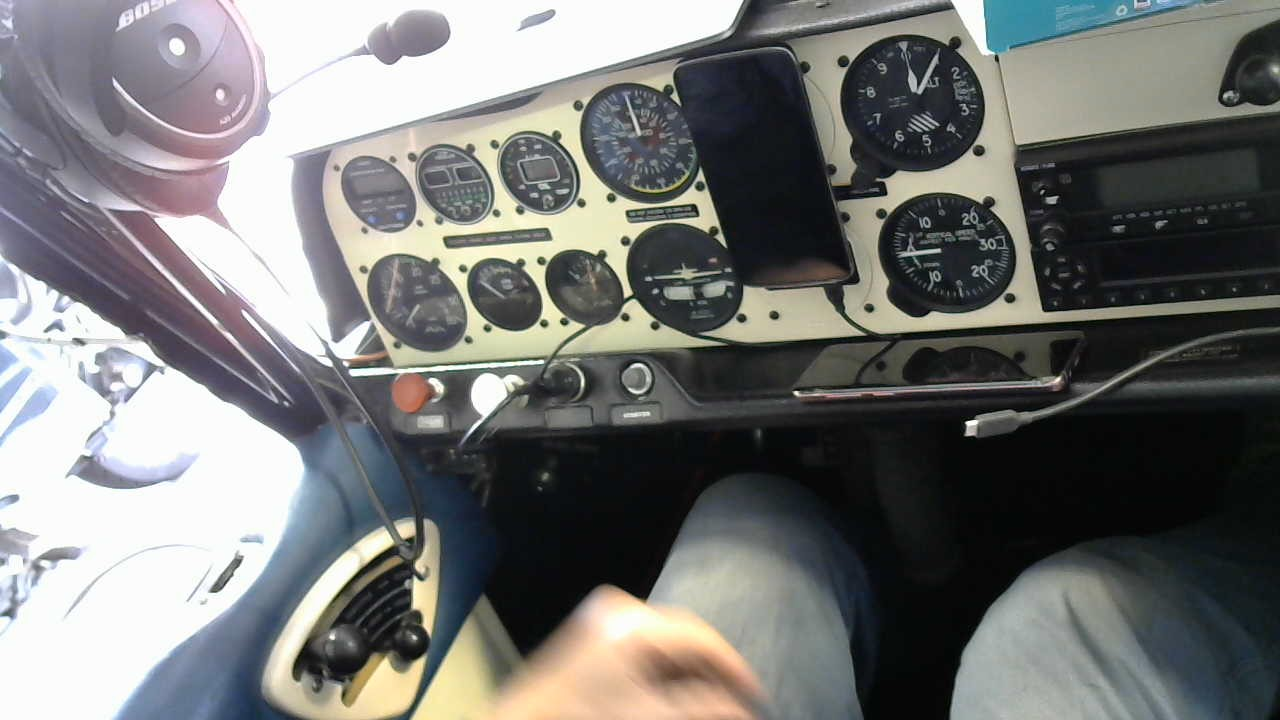

In [255]:
#cv2_imshow(img)
img

In [ ]:
im = np.array(img)

In [ ]:
#get_dial_patches

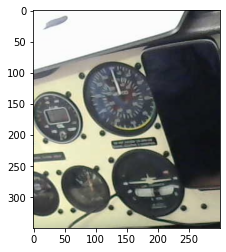

In [312]:
def get_dial_patches(im):
    airspeed = im[0:350,500:800]
    tach = im[200:400,300:500]
    return airspeed, tach

airspeed, tach = get_dial_patches(im)
plt.imshow(airspeed)

In [256]:
img.size

(1280, 720)

In [12]:
type(img)

PIL.Image.Image

In [ ]:
img_shape = (800,600)

In [66]:
img_shape = (800//2, 450//2)

In [67]:
#img_shape = (600,800)
img = img.resize(img_shape)

In [ ]:
#img = img2

In [257]:
im = np.array(img)

In [258]:
im.shape  

(720, 1280, 3)

In [ ]:
img

In [313]:
# Transform the image so the ellipses are now circles

from skimage.transform import AffineTransform, warp

t_inv_airspeed = np.array([[0.65, -.25], [0.1, 0.6]])
print(np.linalg.det(t_inv))
print(t_inv)
t_inv_airspeed /= np.sqrt(np.linalg.det(t_inv_airspeed)) / 1.5
print(np.linalg.det(t_inv_airspeed))
print(t_inv_airspeed)
t_inv_airspeed_full = np.array([[t_inv_airspeed[0,0], t_inv_airspeed[0,1], 0.],
         [t_inv_airspeed[1,0], t_inv_airspeed[1,1], 0.],
         [0.0, 0.0, 1.]])

t_airspeed = np.linalg.inv(t_inv_airspeed_full)

affine_tf_airspeed = AffineTransform(matrix=t_airspeed)

warped_airspeed = warp(airspeed, affine_tf_airspeed)

2.2499999999999996
[[ 1.51349353 -0.58211289]
 [ 0.23284516  1.39707095]]
2.2499999999999996
[[ 1.51349353 -0.58211289]
 [ 0.23284516  1.39707095]]


In [252]:
from skimage import io

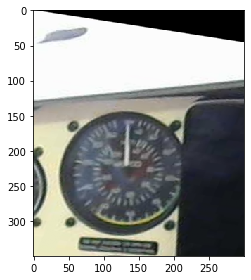

In [314]:
io.imshow(warped_airspeed)

In [118]:
from skimage import color

In [315]:
# gray = cv.cvtColor(warped, cv.COLOR_BGR2GRAY)
# rows = gray.shape[0]
gray_airspeed = color.rgb2gray(warped_airspeed)

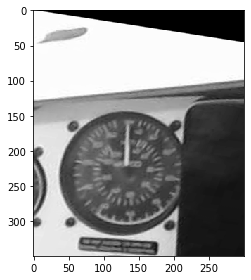

In [317]:
io.imshow(gray_airspeed)

In [72]:
from skimage.transform import hough_ellipse
from skimage.feature import canny

In [319]:
edges_airspeed = canny(gray_airspeed, sigma=0.7,
              low_threshold=0.55, high_threshold=0.9)

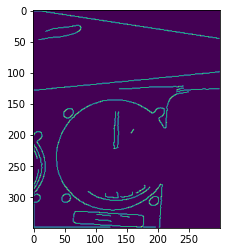

In [320]:
plt.imshow(edges_airspeed)

In [170]:
from skimage.transform import hough_circle, hough_circle_peaks

In [172]:
from skimage.draw import circle_perimeter

In [321]:
# Detect 20 radii
hough_radii = np.arange(50, 200, 1)
hough_res = hough_circle(edges_airspeed, hough_radii)

In [270]:
hough_radii

array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199])

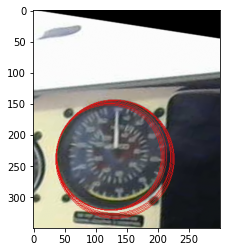

In [322]:
# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, #min_xdistance=20, min_ydistance=20,
                                           total_num_peaks=10)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
#image = color.gray2rgb(image)

image = warped_airspeed.copy()
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220/255, 20/255, 20/255)

ax.imshow(image)#, cmap=plt.cm.gray)
plt.show()

In [274]:
list(zip(cy, cx, radii))

[(344, 461, 55),
 (356, 723, 56),
 (345, 463, 55),
 (343, 460, 54),
 (348, 590, 57),
 (344, 463, 56),
 (358, 724, 58),
 (350, 722, 56),
 (352, 721, 54),
 (353, 723, 56),
 (357, 724, 57),
 (348, 723, 58),
 (346, 585, 55),
 (352, 722, 55),
 (349, 723, 57),
 (351, 725, 58),
 (354, 719, 52),
 (347, 722, 59),
 (353, 720, 53),
 (349, 735, 56),
 (349, 590, 58),
 (354, 718, 51),
 (354, 724, 57),
 (342, 463, 57),
 (352, 726, 59),
 (497, 444, 69),
 (351, 725, 54),
 (354, 719, 57),
 (347, 590, 58),
 (353, 721, 58)]

In [84]:
tick = time.time()
result = hough_ellipse(edges, accuracy=20, threshold=250,
                       min_size=100, max_size=120)
#result.sort(order='accumulator')
print(f"{time.time()-tick} seconds")

KeyboardInterrupt: 

In [ ]:
# https://scikit-image.org/docs/stable/auto_examples/edges/plot_circular_elliptical_hough_transform.html

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4),
                                sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

plt.show()

In [27]:
def is_cluster_in_bounds(cluster, rowbounds, colbounds):
    try:
        cluster_rowmin = np.min(cluster[:,0])
        cluster_rowmax = np.max(cluster[:,0])
        cluster_colmin = np.min(cluster[:,1])
        cluster_colmax = np.max(cluster[:,1])
        cluster_center = [np.mean(cluster[:,0]), np.mean(cluster[:,1])]
        if cluster_rowmin > rowbounds[0] and cluster_rowmax < rowbounds[1] \
        and cluster_colmin > colbounds[0] and cluster_colmax < colbounds[1]:
            return True
        return False
    except:
        return False